In [1]:
# JobTrend prototype 2
# 
# Sila. December 22, 2022

In [2]:
from google.colab import files
uploaded = files.upload()

Saving JobTrendAds.csv to JobTrendAds (1).csv


In [3]:
# Upload the JobTrendAds.csv file
!ls

'JobTrendAds (1).csv'   JobTrendAds.csv   sample_data


In [4]:
# Read Jobfile
import pandas as pd

colnames=['Source.Name','ID', 'Date time', 'Details', 'Region', 'Rest'] 
df = pd.read_csv("JobTrendAds.csv", usecols = colnames, encoding="utf-8", sep=';', header = 0 )

# The JobTrend file must saved in utf-8 format

In [5]:
df.rename(columns = {'Rest':'JobAdText'}, inplace = True)
# show the data
print ( df .describe( include = 'all' ))
#the describe is a great way to get an overview of the data
print ( df .values)

              Source.Name            ID            Date time  \
count                 296  2.960000e+02                  296   
unique                296           NaN                  295   
top     00031-1805634.txt           NaN  2020-02-21 22:37:21   
freq                    1           NaN                    2   
mean                  NaN  1.053727e+06                  NaN   
std                   NaN  5.156326e+05                  NaN   
min                   NaN  7.153000e+03                  NaN   
25%                   NaN  6.856040e+05                  NaN   
50%                   NaN  1.080747e+06                  NaN   
75%                   NaN  1.446393e+06                  NaN   
max                   NaN  1.960349e+06                  NaN   

                   Details              Region  \
count                  296                 296   
unique                 242                   8   
top     Multimediedesigner  region-midtjylland   
freq                     8     

In [6]:
df.drop('Source.Name' , axis = 1 , inplace = True )
df.drop('Date time' , axis = 1 , inplace = True )
df.drop('Details' , axis = 1 , inplace = True )
df.drop('Region' , axis = 1 , inplace = True )

# show the data
print ( df.describe( include = 'all' ))

                  ID                                          JobAdText
count   2.960000e+02                                                296
unique           NaN                                                295
top              NaN                     Menu      Søg              ...
freq             NaN                                                  2
mean    1.053727e+06                                                NaN
std     5.156326e+05                                                NaN
min     7.153000e+03                                                NaN
25%     6.856040e+05                                                NaN
50%     1.080747e+06                                                NaN
75%     1.446393e+06                                                NaN
max     1.960349e+06                                                NaN


In [7]:
print(df['JobAdText'].to_string(index=False))

                                               ...
                                               ...
               ...eller  |                     ...
                                               ...
               ...eller  |                     ...
                                               ...
                                               ...
Your files are currently being uploaded, this m...
                                               ...
                                               ...
           Din aktuelle tilstand: Sælg ikke min...
                Multimediedesigner Praktikant R...
                                               ...
                                   Log ind     ...
             Digital marketeer  Zealand Care A/...
                                               ...
                Frontend Developer Intern Wedio...
                                               ...
                 Udskriv annonce          Video...
                               

In [8]:
df['JobAdText'] = df['JobAdText'].apply(str)

for column in df.columns[1:]:
    print(df[column])

0                                                    ...
1                                                    ...
2                     ...eller  |                    ...
3                                                    ...
4                     ...eller  |                    ...
                             ...                        
291                   ...eller  |                    ...
292                                              Stud...
293                    Praktikant i Multimedia design...
294              Webmaster til vores nye websiteVil d...
295                   ...eller  |                    ...
Name: JobAdText, Length: 296, dtype: object


In [9]:
# Could find sentences with regular expressions, SpaCy etc.
# (But) Using nltk here.

In [10]:
from nltk import tokenize

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nb_personal_qualifications = 0
nb_understanding_qualifications = 0
nb_analyze_qualifications = 0
nb_evaluation_qualifications = 0
nb_create_qualifications = 0
nb_technical_qualifications = 0

# For start, only look at 1 row
for row in df.head(1).itertuples():
    AdText = row.JobAdText

    Sentences = tokenize.sent_tokenize(AdText)

    # ToDO - This must read from Excel file
    nb_personal_qualifications = 1
    nb_understanding_qualifications = 1
    nb_analyze_qualifications = 0
    nb_evaluation_qualifications = 0
    nb_create_qualifications = 1
    nb_technical_qualifications = 0

In [13]:
print(Sentences)

['                                                                                                                                                                                                                                                                              Digital Marketing Koordinator  A/S Vestfrost  Esbjerg  Indrykket\xa029.\xa0oktober\xa02021    Vil du være med til at opbygge et marketingsunivers for en mellemstor B2B-virksomhed?', 'I en nyoprettet stilling får du i høj grad mulighed for at sætte dit præg på, hvordan Vestfrost opfattes af kunder og partnere gennem udarbejdelsen af virksomhedens marketingmateriale.', 'Så brænder du for online marketing?', 'Kan du skabe digitale kampagner med målbar effekt og konverteringer?', 'Har du flair for at arbejde med content og sociale medier?', 'Så har vi jobbet til dig!', 'Du skal være med til at løfte vores digitale salgs- og marketingaktiviteter for vores forskellige brands, samt tiltrække nye kunder.', 'Dine primære opgave

In [14]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from sentence_transformers import SentenceTransformer, util

In [16]:
# https://huggingface.co/sentence-transformers/multi-qa-MiniLM-L6-cos-v1

model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

In [17]:
import numpy as np

In [18]:
def FindkHighestkNumbers(scores, k):
    return (-scores).argsort()[:k]

In [19]:
def FindMostSimilarSentences(Corpus, LookupSentence):
    # encode corpus to get corpus embeddings
    corpus_embeddings = model.encode(Corpus, convert_to_tensor=True)
    # encode sentence to get sentence embeddings
    sentence_embedding = model.encode(LookupSentence, convert_to_tensor=True)# top_k results to return
    top_k=2# compute similarity scores of the sentence with the corpus
    cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings)[0]# Sort the results in decreasing order and get the first top_k
    # top_results = np.argpartition(-cos_scores, range(top_k))[0:top_k] #CPU
    top_results= FindkHighestkNumbers(cos_scores,top_k) #GPU
    print("\n", "Sentence:", LookupSentence, "\n")
    print("Top", top_k, "most similar sentences in corpus:")
    for idx in top_results[0:top_k]:
       print(Corpus[idx], "(Score: %.4f)" % (cos_scores[idx]))

    return top_results

In [20]:
def FindMostSimilarSentence(Corpus, LookupSentence):
    # encode corpus to get corpus embeddings
    corpus_embeddings = model.encode(Corpus, convert_to_tensor=True)
    # encode sentence to get sentence embeddings
    sentence_embedding = model.encode(LookupSentence, convert_to_tensor=True)# top_k results to return
    top_k=1# compute similarity scores of the sentence with the corpus
    cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings)[0]# Sort the results in decreasing order and get the first top_k
    # top_results = np.argpartition(-cos_scores, range(top_k))[0:top_k] #CPU
    top_results= FindkHighestkNumbers(cos_scores,top_k) #GPU

    # print("\n", "Sentence:", LookupSentence, "\n")
    # print("Top", top_k, "most similar sentences in corpus:")
    best_result=0
    for idx in top_results[0:top_k]:
       #print(Corpus[idx], "(Score: %.4f)" % (cos_scores[idx]))
       best_result= cos_scores[idx] 

    return Corpus[top_results[0]], best_result

In [21]:
target_sentence = "Har gode kommunikationsevner"

In [22]:
# Test
# FindMostSimilarSentences(Sentences, target_sentence) 
FindMostSimilarSentence(Sentences, target_sentence) 

('Du giver også virksomheden mulighed for at kontakte dig, hvis de i fremtiden har et job, der matcher dine kompetencer.',
 tensor(0.4745, device='cuda:0'))

In [23]:
personal_qualifications=['Har gode kommunikationsevner',
'Kan arbejde selvmotiverende',
'Du tager ansvar for dine projekter og følger altid dine opgaver til dørs',
'Vi forventer, at du som person er selvledende, kreativ, fleksibel og indstillet på at arbejde i et travlt miljø.',
'Du er nysgerrig, kritisk og løsningsorienteret - også når det bliver komplekst',
'Du har drive, og passion for kvalitet',
'Du er god til at tænke ud af boksen, er ambitiøst og kreativt tænkende',
'er engageret, har god energi og er en god kollega',
'Som person er du først og fremmest kreativ og du er god til at finde på nye løsninger',
'Du er ansvarsfuld, selvstændig og har mod på at udvikle dig'
'Være initiativrig og opsøgende',
'Ivrig efter af lære Som person forestiller vi os, at du er engageret, kreativ og nysgerrig',
'Du er god til at skabe relationer på tværs',
'er selvstændig og grundig',
'Du har flair for content',
'Du er frisk, nede på jorden og klar på en god snak med dine kollegaer',
'Du trives med rutineprægede opgaver, og bidrager med masser af godt humør',
'Er optimist og ser muligheder fremfor begrænsninger',
'Vi forestiller os, at du som person er kreativ, visuel og har god sans for detaljen.Vi forestiller os, at du som person er kreativ, visuel og har god sans for detaljen',
'Som menneske er du udadvendt, opsøgende og pædagogisk',
'Er kvalitetsbevidst og sætter en stolthed i at udføre et godt stykke arbejde',
'Er detaljeorienteret og har en struktureret tilgang til dine arbejdsopgaver',
'Er god til at tale med mennesker og sætte sig ind i deres behov',
'Du er detaljeorienteret til mindste detalje og stortrives med en bred kontaktflade',
'Du er struktureret og har høj selvdisciplin',
'Du udviser en høj grad af uafhængighed, er proaktiv og selvstartende',
'Vi søger en person, der er detaljeorienteret og analytisk stærk',
'Du trives med at være opsøgende Du kan arbejde både selvstændigt og som del af et mindre team',
'er ansvarlig, struktureret og målorienteret samt serviceminded, positiv og imødekommende',
'Kreativ, nysgerrig, initiativrig og ikke bange for at spørge. Struktureret og detaljeorienteret',
'At du har et godt drive, kan arbejde selvstændigt, struktureret og tage ansvar',
'Du er god til at styre din tid og trives med at have mange bolde i luften']

In [24]:
understanding_qualifications = ['du har en grundlæggende viden om e-commerce, web og B2C-marketing med fokus på den gode brugeroplevelse',
'Design og udvikling af multimediale produkter IT-didaktik og læringsteori User Experience og interaktionsdesign Designpsykologi og adfærdsdesign',
'Har forståelse for designguides og følger den i opbygningen af det visuelle udtryk på vores website', 
'Samtidigt har du forståelse for hvordan dine designs kan omsættes til færdigt implementerede løsninger i udviklingsafdelingen som du kommer til at sparre med dagligt',
'Du har god forståelse for brugervenlighed, UX og typografi',
'kendskab til platformsøkonomi',
'Du har en solid viden om sociale medier og kender Facebook og Instagram',
'God forståelse for UX-design og digitale brugeroplevelser']  

In [25]:
use_qualifications = ['Udbygge og vedligeholde content på Vestfrost-hjemmesiden',
'Content til SoMe',
'Opdatering og vedligeholdelse af datablade samt brochure',
'Content til cases',
'Relevant markedsføringsmateriale såsom billede, video, messemateriale m.m.',
'WordPress installationer og plugins',
'Onpage SEO optimering i WordPress']

In [26]:
analyze_qualifications = ['At hjælpe vores kunder med grafisk input til deres spil',
'Forbedre vores kunders grafiske oplevelse af Scratcher',
'Du ser mulighederne i at analysere kundedata – blandt andet GA - og på den baggrund kan du designe funnels',
'Du har solid viden om opsætning af normal CSS Du har god forståelse for Bootstrap 3-5 Du har kendskab til VS-Code Du kan udvikle HTML responsivt Du behersker Adobe Creative Cloud (primært Photoshop og Illustrator) Har du kendskab til Java Script betragtes det som et plus',
'Du kan analysere og finde trends med fokus på optimering',
'På baggrund af brugerdata skal du formidle indholdet, så det matcher målgrupperne og kampagnestrategien, og det er vigtigt, at du har tæft for og måske oven i købet erfaring med god webkommunikation.',
'har en analytisk sans og forstår at videreformidle data om målgrupper']

In [27]:
evaluation_qualifications = ['Ansvar for opbygning af bibliotekets nye designsystem, herunder interaktionsdesign på kb.dk',
'generelt kan have en faglig stærk dialog i proces og præsentationer',
'Evaluering og test af e-læring',
'Strategisk sparring med samarbejdspartnere om brugen af e-læring',
'Vejledning til skatteforvaltningens medarbejdere om egen udvikling af e-læring']

In [28]:
create_qualifications = ['Udvikle og producere grafisk indhold til vores digitale medier herunder SoMe og bannerannoncer',
'Med udgangspunkt i din faglighed vil du få ansvaret for at omsætte kundens krav til motiverende og effektskabende digitale produktioner, som understøtter de fastsatte læringsmål',
'Du vil blive omdrejningspunktet for vores digitale udvikling, og du vil være med til at sætte dagordenen for årene, der kommer',
'Og så skal du udvikle lækre grafiske løsninger, der bidrager til at nå de rette målgrupper effektivt',
'udtænke og skabe iøjnefaldende visuelt indhold til sociale medier, hjemmeside mv.']

In [29]:
technical_qualifications = ['Har erfaring i brug af InDesign, Illustrator og Photoshop',
'Erfaring med SEO',
'Kendskab til CSS',
'Superbruger i WordPress Interesse i den tekniske del af online markedsføring (SoMe og Adwords)',
'Begynderniveau i CSS, PHP og JavaScript', 
'Du er en erfaren bruger af Creative Suite og har styr på Adobe Photoshop']

In [30]:
def FindPersonalQualificationsVerbose(Corpus):
  for i in range(len(personal_qualifications)):
     Lookup_Sentence=personal_qualifications[i]
     FindMostSimilarSentences(Sentences, Lookup_Sentence)

In [31]:
FindPersonalQualificationsVerbose(Sentences)


 Sentence: Har gode kommunikationsevner 

Top 2 most similar sentences in corpus:
Du giver også virksomheden mulighed for at kontakte dig, hvis de i fremtiden har et job, der matcher dine kompetencer. (Score: 0.4745)
Vi holder løbende samtaler med relevante kandidater. (Score: 0.4510)

 Sentence: Kan arbejde selvmotiverende 

Top 2 most similar sentences in corpus:
For at vise interesse skal du have et online CV. (Score: 0.3963)
Vis interesse for job    For at vise interesse skal du have et online CV. (Score: 0.3854)

 Sentence: Du tager ansvar for dine projekter og følger altid dine opgaver til dørs 

Top 2 most similar sentences in corpus:
Klik på knappen nedenfor og opret dit CV - det tager kun 5 minutter. (Score: 0.5301)
21367087       ()                         Ansvarlig brug af dine oplysninger (Score: 0.5284)

 Sentence: Vi forventer, at du som person er selvledende, kreativ, fleksibel og indstillet på at arbejde i et travlt miljø. 

Top 2 most similar sentences in corpus:
Vi f

In [32]:
def FindPersonalQualificationsVerbose(Corpus):
  for i in range(len(personal_qualifications)):
     Lookup_Sentence=personal_qualifications[i]
     bestmatch, bestmatchvalue = FindMostSimilarSentence(Sentences, Lookup_Sentence)
     print(Lookup_Sentence)
     print(bestmatch, bestmatchvalue)

In [33]:
FindPersonalQualificationsVerbose(Sentences)

Har gode kommunikationsevner
Du giver også virksomheden mulighed for at kontakte dig, hvis de i fremtiden har et job, der matcher dine kompetencer. tensor(0.4745, device='cuda:0')
Kan arbejde selvmotiverende
For at vise interesse skal du have et online CV. tensor(0.3963, device='cuda:0')
Du tager ansvar for dine projekter og følger altid dine opgaver til dørs
Klik på knappen nedenfor og opret dit CV - det tager kun 5 minutter. tensor(0.5301, device='cuda:0')
Vi forventer, at du som person er selvledende, kreativ, fleksibel og indstillet på at arbejde i et travlt miljø.
Vi forventer, at du:  Har en relevant professionsbachelor i e-handel, er multimediedesigner, markedsføringsøkonom eller grafisk uddannet Har erfaring i brug af InDesign, Illustrator og Photoshop Har gode kommunikationsevner Kan arbejde selvmotiverende Er fejlfri på skriftlig dansk og engelsk Erfaring med SEO. tensor(0.6143, device='cuda:0')
Du er nysgerrig, kritisk og løsningsorienteret - også når det bliver komplekst
Ka

In [34]:
# Find best matches, above threshold

In [43]:
def FindQualifications(Corpus, qualifications, threshold):
  Lookup_Sentences = []
  BestMatches = []
  BestMatchValues = []
  for i in range(len(qualifications)):
     Lookup_Sentence= qualifications[i]
     bestmatch, bestmatchvalue = FindMostSimilarSentence(Corpus, Lookup_Sentence)
     # print(Lookup_Sentence)
     # print(bestmatch)
     # print(bestmatchvalue)
     # print(bestmatchvalue.cpu().detach().numpy())
     if bestmatchvalue.cpu().detach().numpy()>threshold:     
        Lookup_Sentences.append(Lookup_Sentence)
        BestMatches.append(bestmatch)
        BestMatchValues.append(bestmatchvalue.cpu().detach().numpy())
  return Lookup_Sentences, BestMatches, BestMatchValues

In [46]:
def FindTopKQualifications(Corpus, qualifications, typeofqualification, threshold, UseVerbose):
    Lookup_Sentences, BestMatches, BestMatchValues = FindQualifications(Corpus, qualifications, threshold)

    if UseVerbose == True:
       print("\n")
       print(typeofqualification,"qualifications in JobAds.")
       print("For threshold: ", threshold)
    found_matches = 0
    for idx in range(len(Lookup_Sentences)):
       found_matches = 1
       if UseVerbose == True:
           print("Match :", idx+1)
           print('Lookup: ', Lookup_Sentences[idx])
           print('Match: ', BestMatches[idx], "(Score: %.4f)" % (BestMatchValues[idx]))
    return found_matches

In [37]:
import time

In [47]:
t1 = time.perf_counter()
threshold=0.6
Found_personal_qualifications = FindTopKQualifications(Sentences, personal_qualifications, "Personal", threshold, True)
Found_understanding_qualifications = FindTopKQualifications(Sentences, understanding_qualifications, "Understanding", threshold, True)
Found_analyze_qualifications = FindTopKQualifications(Sentences, analyze_qualifications, "Anlyze", threshold, True)
Found_evaluation_qualifications = FindTopKQualifications(Sentences, evaluation_qualifications, "Evaluation", threshold, True)
Found_create_qualifications = FindTopKQualifications(Sentences, create_qualifications, "Create", threshold, True)
Found_technical_qualifications = FindTopKQualifications(Sentences, technical_qualifications, "Technical", threshold, True)
t2 = time.perf_counter()
print('time taken to run:',t2-t1)




Personal qualifications in JobAds.
For threshold:  0.6
Match : 1
Lookup:  Vi forventer, at du som person er selvledende, kreativ, fleksibel og indstillet på at arbejde i et travlt miljø.
Match:  Vi forventer, at du:  Har en relevant professionsbachelor i e-handel, er multimediedesigner, markedsføringsøkonom eller grafisk uddannet Har erfaring i brug af InDesign, Illustrator og Photoshop Har gode kommunikationsevner Kan arbejde selvmotiverende Er fejlfri på skriftlig dansk og engelsk Erfaring med SEO. (Score: 0.6143)
Match : 2
Lookup:  Du har flair for content
Match:  Har du flair for at arbejde med content og sociale medier? (Score: 0.6140)


Understanding qualifications in JobAds.
For threshold:  0.6
Match : 1
Lookup:  Du har en solid viden om sociale medier og kender Facebook og Instagram
Match:  Har du flair for at arbejde med content og sociale medier? (Score: 0.6899)


Anlyze qualifications in JobAds.
For threshold:  0.6


Evaluation qualifications in JobAds.
For threshold:  0.6

In [112]:
def FindPositveAndNegativeExamplesForQualifications(threshold, UsingVerbose):
   true_positives = 0
   false_negatives = 0
   false_positives = 0
   true_negatives =0
   nb_rows = 0
   # Run Through entire dataset 
   for row in df.head(10).itertuples():
       AdText = row.JobAdText

       Sentences = tokenize.sent_tokenize(AdText)

       # ToDO - This must read from Excel file
       # nb_personal_qualifications = np.random.choice([0,1])
       qualificationsreadfromexcel = np.array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1])
       nb_personal_qualifications =  qualificationsreadfromexcel[nb_rows]

       nb_rows += 1

       Found_personal_qualifications = FindTopKQualifications(Sentences, personal_qualifications, "Personal", threshold, UsingVerbose)
       if nb_personal_qualifications == 1:
           if Found_personal_qualifications == 1: 
              true_positives += 1
           else:
              false_negatives += 1
       else:
           if Found_personal_qualifications == 1: 
              false_positives += 1
           else:
              true_negatives += 1
    
   return true_positives, false_negatives, false_positives, true_negatives, nb_rows

In [113]:
true_positives, false_negatives, false_positives, true_negatives, nb_rows = FindPositveAndNegativeExamplesForQualifications(0.6, True)



Personal qualifications in JobAds.
For threshold:  0.6
Match : 1
Lookup:  Vi forventer, at du som person er selvledende, kreativ, fleksibel og indstillet på at arbejde i et travlt miljø.
Match:  Vi forventer, at du:  Har en relevant professionsbachelor i e-handel, er multimediedesigner, markedsføringsøkonom eller grafisk uddannet Har erfaring i brug af InDesign, Illustrator og Photoshop Har gode kommunikationsevner Kan arbejde selvmotiverende Er fejlfri på skriftlig dansk og engelsk Erfaring med SEO. (Score: 0.6143)
Match : 2
Lookup:  Du har flair for content
Match:  Har du flair for at arbejde med content og sociale medier? (Score: 0.6140)


Personal qualifications in JobAds.
For threshold:  0.6


Personal qualifications in JobAds.
For threshold:  0.6
Match : 1
Lookup:  Du er nysgerrig, kritisk og løsningsorienteret - også når det bliver komplekst
Match:  Det er vores opgave at sørge for, at vores kunder får den rigtige tekniske løsning, som passer til kundens størrelse og krav. (Sc

In [114]:
print(true_positives, false_negatives, false_positives, true_negatives, nb_rows)

7 0 0 3 10


In [115]:
import matplotlib.pyplot as plt
import numpy as np


def PlotRocCurve():

   # false positive rate
   fpr = []
   # true positive rate
   tpr = []
   # Iterate thresholds from 0.0, 0.1, ... 1.0
   thresholds = np.arange(0.0, 1.01, .2)

   # iterate through all thresholds and determine fraction of true positives
   # and false positives found at this threshold
   for thresh in thresholds:       
       true_positives, false_negatives, false_positives, true_negatives, nb_rows = FindPositveAndNegativeExamplesForQualifications(thresh, False)

       if (false_positives + true_negatives) != 0:   
         if (true_positives + false_negatives) != 0:  
            fpr.append(false_positives / float(false_positives + true_negatives))
            tpr.append(true_positives / float(true_positives + false_negatives))
     
   plt.scatter(fpr, tpr)

   ypoints = np.array([0, 1])
   plt.plot(ypoints, linestyle = 'dotted')

   plt.show()

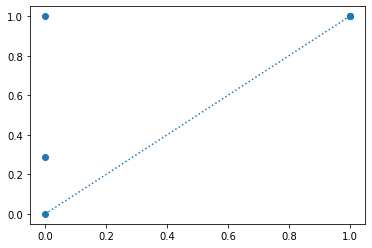

In [116]:
PlotRocCurve()

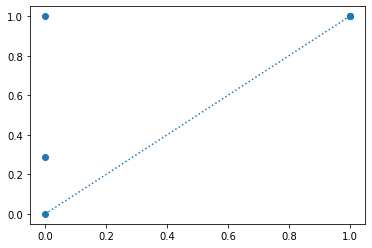

Search through 10 ads. Time taken to run: 139.49233896999976


In [117]:
t1 = time.perf_counter()
PlotRocCurve()
t2 = time.perf_counter()
print('Search through 10 ads. Time taken to run:',t2-t1)

In [118]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-a142dd1c-569f-c42b-be29-17aaef4e7f7d)


In [119]:
!nvidia-smi 

Fri Dec 23 19:31:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    32W /  70W |   2286MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------